In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from sklearn.preprocessing import LabelEncoder

In [2]:
# 配置显示参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [3]:
df = pd.read_csv("深圳_geo.csv", encoding='utf-8', encoding_errors="ignore")

In [4]:
print(df.head())

   小区名称   房屋朝向 装修情况  供暖方式 户型结构  建筑类型  建筑结构  梯户比例 配备电梯        挂牌时间  ...   街道  \
0  兴业大厦      南   其他   NaN   平层    塔楼  钢混结构  两梯八户    有  2024-12-15  ...  春风路   
1  云峰花园  东南 东北   简装   NaN   平层    塔楼  钢混结构  三梯九户    有  2025-02-22  ...  春风路   
2  瑞丰大厦     西南   其他   NaN   平层  板塔结合  框架结构  两梯八户    有  2024-09-04  ...  春风路   
3  云峰花园     西南   精装   NaN   平层    塔楼  钢混结构  三梯九户    有  2025-03-06  ...  春风路   
4   经贸楼    南 北   其他   NaN   平层    板楼  砖混结构  两梯五户    有  2024-06-21  ...  春风路   

  环线位置  居住空间   功能间 总价(万元) 单价(元/平)  房屋面积(平米)             地址        lat  \
0  NaN  4室2厅  2厨2卫  315.0   35032     89.92  深圳市罗湖区春风路兴业大厦  22.542570   
1  NaN  4室2厅  1厨2卫  315.0   35554     88.60  深圳市罗湖区春风路云峰花园  22.538255   
2  NaN  4室1厅  1厨1卫  420.0   58799     71.43  深圳市罗湖区春风路瑞丰大厦  22.536587   
3  NaN  3室2厅  1厨1卫  350.0   40496     86.43  深圳市罗湖区春风路云峰花园  22.538255   
4  NaN  2室1厅  1厨1卫  350.0   43937     79.66   深圳市罗湖区春风路经贸楼  22.542566   

          lon  
0  114.119680  
1  114.122917  
2  114.125418  
3  114.122917  
4  114

# 1

【总价(万元)】的五数概括:
最小值: 77.00
Q1（25%分位数）: 330.00
中位数（Q2）: 459.00
Q3（75%分位数）: 690.00
最大值: 5800.00
------------------------------


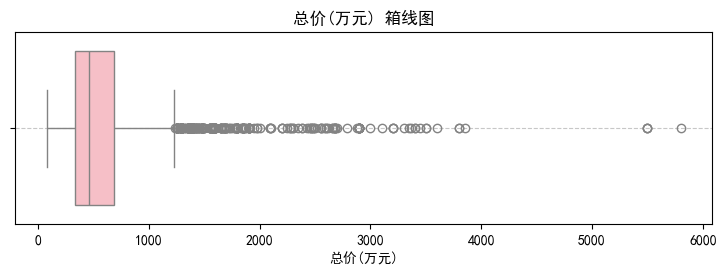

【单价(元/平)】的五数概括:
最小值: 20156.00
Q1（25%分位数）: 40382.00
中位数（Q2）: 53410.00
Q3（75%分位数）: 73564.00
最大值: 299676.00
------------------------------


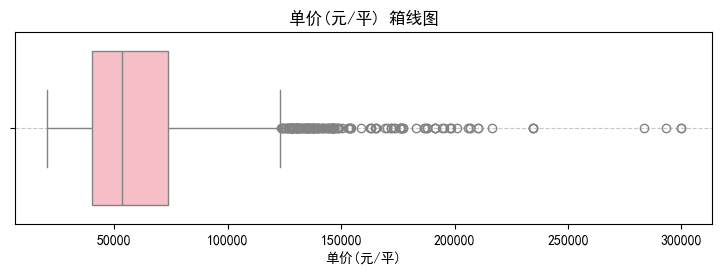

【房屋面积(平米)】的五数概括:
最小值: 29.31
Q1（25%分位数）: 85.04
中位数（Q2）: 88.58
Q3（75%分位数）: 89.94
最大值: 448.78
------------------------------


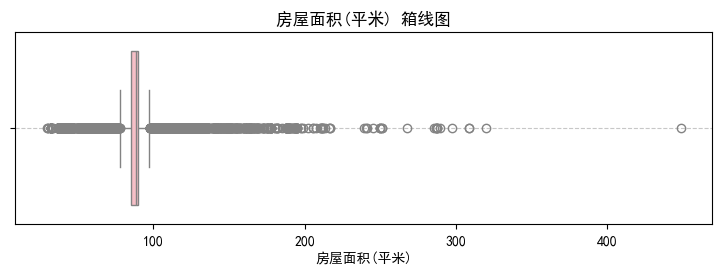

In [24]:
columns_to_plot = ["总价(万元)", "单价(元/平)", "房屋面积(平米)"]

for col in columns_to_plot:
    # 输出统计量
    stats = df[col].describe(percentiles=[0.25, 0.5, 0.75])
    Q1 = stats["25%"]
    Q2 = stats["50%"]
    Q3 = stats["75%"]
    min_val = stats["min"]
    max_val = stats["max"]
    
    print(f"【{col}】的五数概括:")
    print(f"最小值: {min_val:.2f}")
    print(f"Q1（25%分位数）: {Q1:.2f}")
    print(f"中位数（Q2）: {Q2:.2f}")
    print(f"Q3（75%分位数）: {Q3:.2f}")
    print(f"最大值: {max_val:.2f}")
    print("-" * 30)
    
    # 绘制箱线图
    plt.figure(figsize=(9,2.5))
    sns.boxplot(x=df[col], color="#FFB6C1")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f"{col} 箱线图")
    plt.show()

# 1

### 普通成对关系图和相关性热力图

In [15]:
import matplotlib.colors as mcolors
# 定义颜色列表
colors = [
    '#FDEEF0',  # 非常浅的粉色（接近白色）
    '#FADBDF',  # 非常浅的粉色（接近白色）
    '#F5B9C2',  # 浅粉色
    '#F6BDC5',  # 柔和的粉色
    '#F3ABB6',  # 深一点的粉色
    '#EE8594',  # 深粉色
    '#FAD1E7',  # 更深的粉色
    '#F8BEDE',  # 深红色（可选，用于渐变的末端）
    '#F7B5D9',  # 深红色（可选，用于渐变的末端）
    '#F6A9D2',  # 深红色（可选，用于渐变的末端）
    '#F285C0'   # 深红色（可选，用于渐变的末端）
]

# 创建自定义的渐变颜色映射
pink_cmap = mcolors.LinearSegmentedColormap.from_list("pink_cmap", colors)

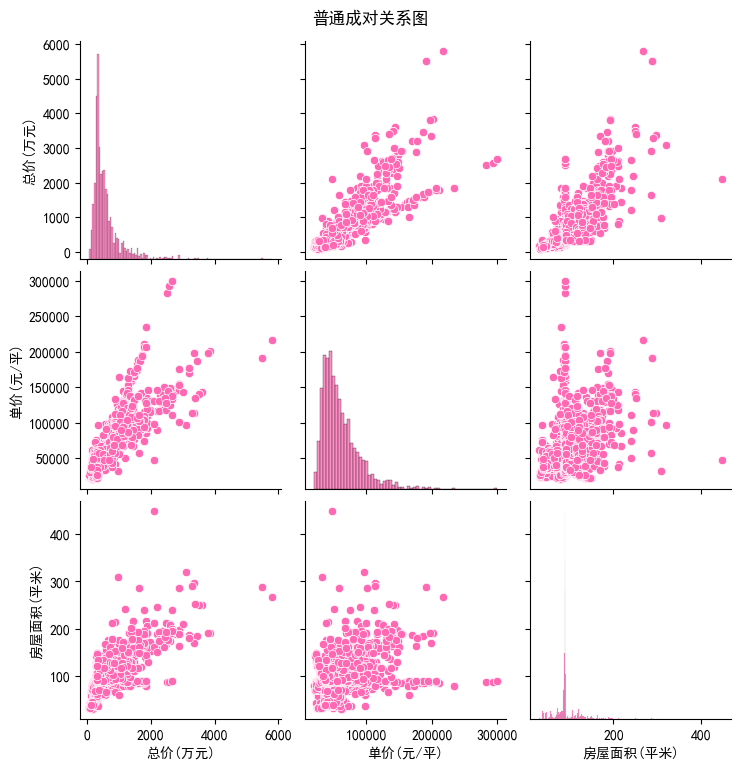

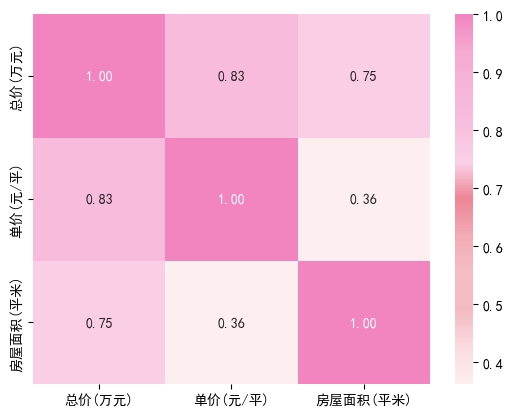

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = df[["总价(万元)", "单价(元/平)", "房屋面积(平米)"]]

# 绘制普通的 pairplot 图
sns.pairplot(data1, plot_kws={"color": "hotpink"}, diag_kws={"color": "hotpink"})
plt.suptitle("普通成对关系图", y=1.02)  # 添加总标题
plt.show()

# 相关性热力图
sns.heatmap(data1.corr(), annot=True, cmap=pink_cmap, fmt='.2f')
plt.show()


# 1

### 默认散点图

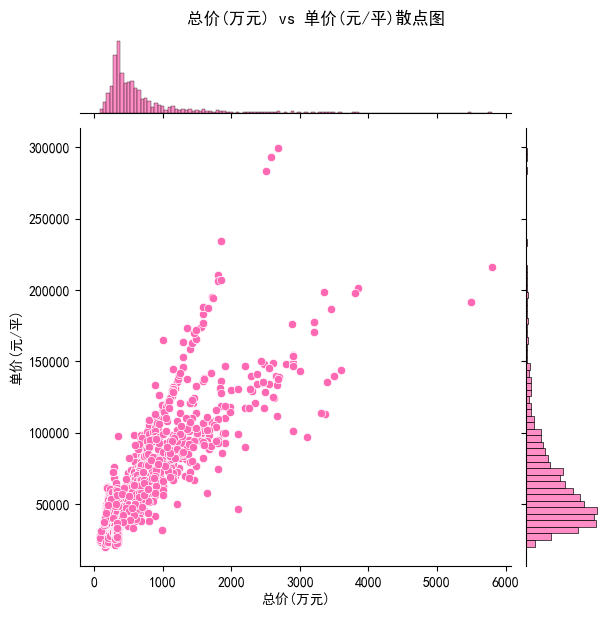

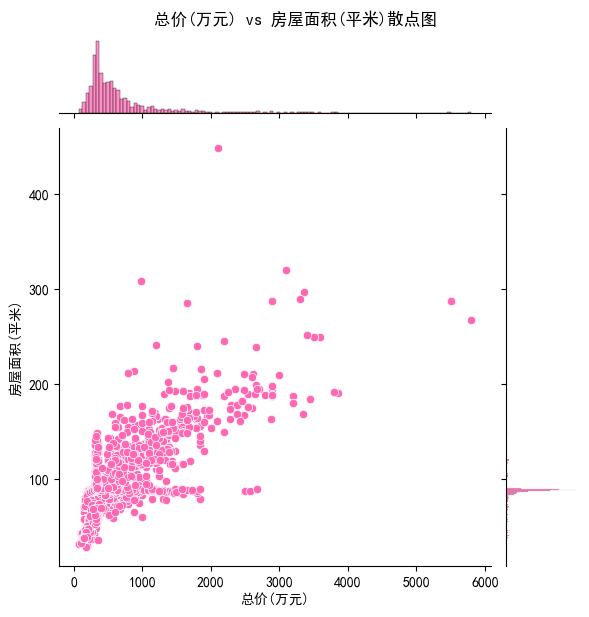

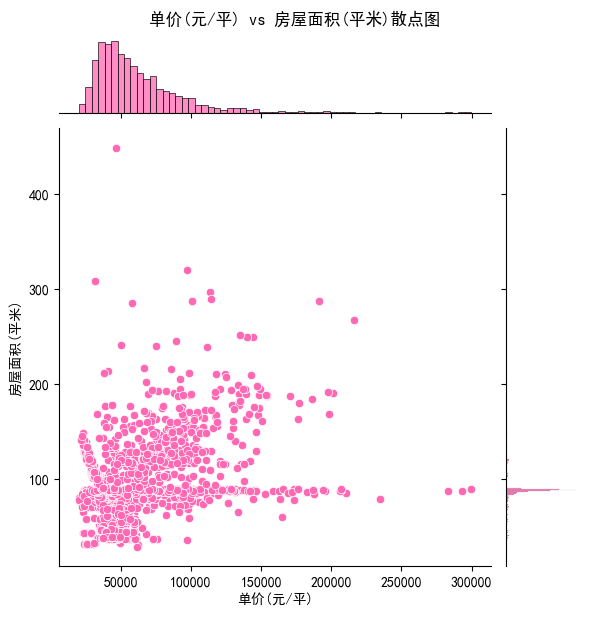

In [25]:
# 1. 默认散点图
sns.jointplot(x='总价(万元)', y='单价(元/平)', data=data1, color='hotpink') 
plt.suptitle("总价(万元) vs 单价(元/平)散点图", y=1.02)
plt.show()
sns.jointplot(x='总价(万元)', y='房屋面积(平米)', data=data1, color='hotpink')
plt.suptitle("总价(万元) vs 房屋面积(平米)散点图", y=1.02) 
plt.show()
sns.jointplot(x='单价(元/平)', y='房屋面积(平米)', data=data1, color='hotpink') 
plt.suptitle("单价(元/平) vs 房屋面积(平米)散点图", y=1.02) 
plt.show()

### 六边形分布图

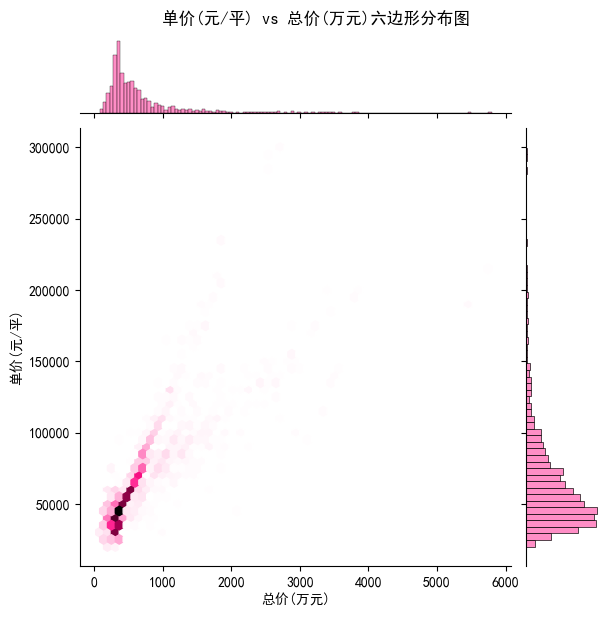

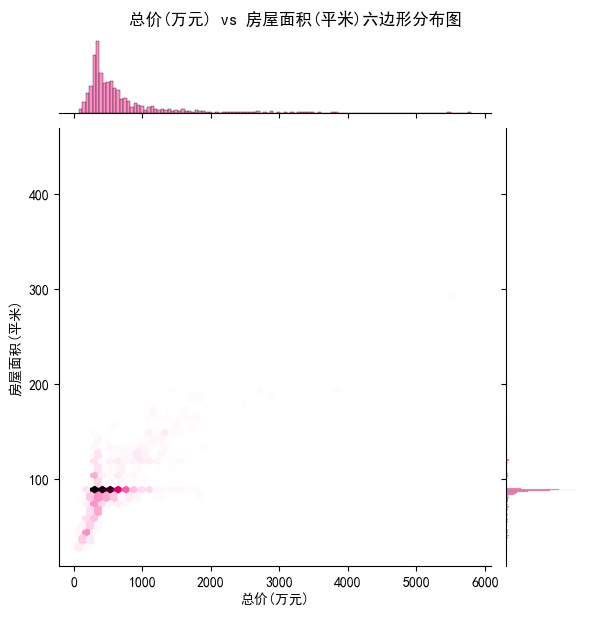

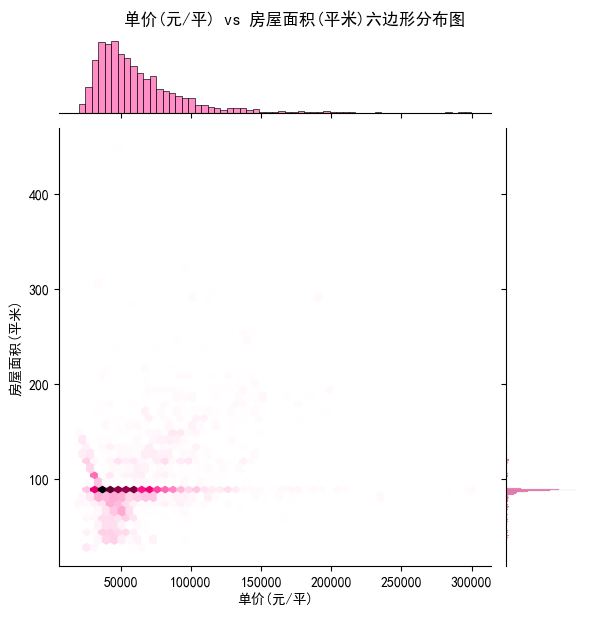

In [26]:
# 2. 六边形分布图（Hexbin plot）
sns.jointplot(x='总价(万元)', y='单价(元/平)', data=data1, kind='hex', color='hotpink')  # 指定颜色为橙色
plt.suptitle("单价(元/平) vs 总价(万元)六边形分布图", y=1.02)  # 添加总标题
plt.show()

sns.jointplot(x='总价(万元)', y='房屋面积(平米)', data=data1, kind='hex', color='hotpink')
plt.suptitle("总价(万元) vs 房屋面积(平米)六边形分布图", y=1.02)
plt.show()

sns.jointplot(x='单价(元/平)', y='房屋面积(平米)', data=data1, kind='hex', color='hotpink')
plt.suptitle("单价(元/平) vs 房屋面积(平米)六边形分布图", y=1.02)
plt.show()

### 回归拟合图

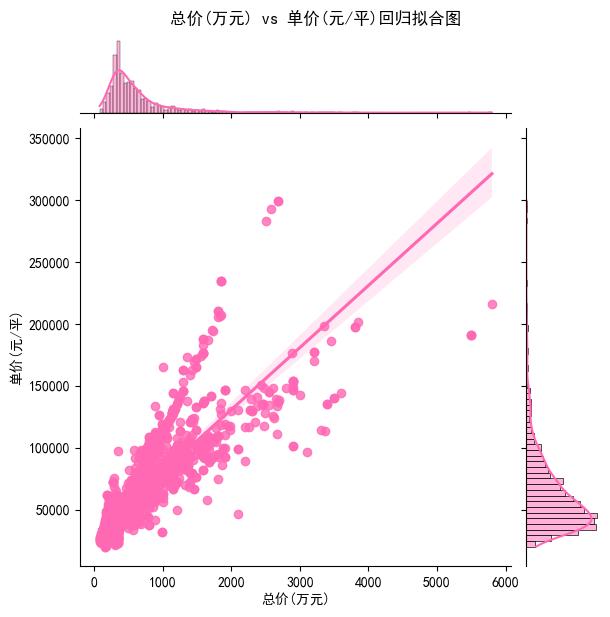

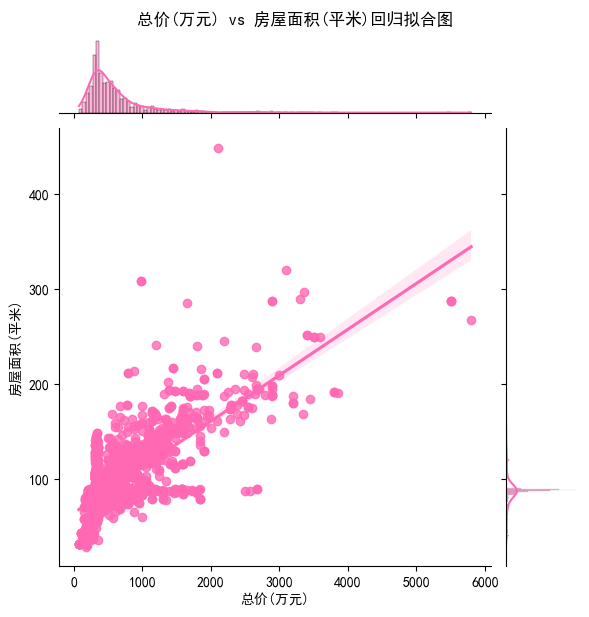

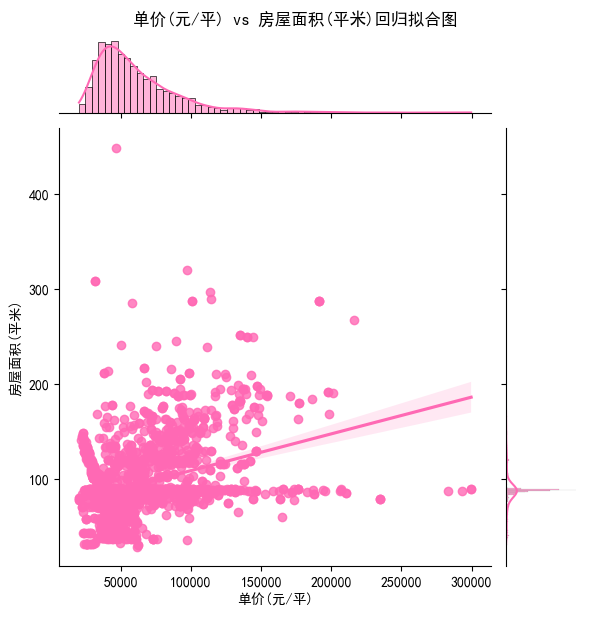

In [27]:
# 3. 回归拟合图（Regression plot）
# 总价(万元) vs 单价(元/平)回归拟合图
sns.jointplot(x='总价(万元)', y='单价(元/平)', data=data1, kind='reg', color='hotpink')
plt.suptitle("总价(万元) vs 单价(元/平)回归拟合图", y=1.02)
plt.show()

# 总价(万元) vs 房屋面积(平米)回归拟合图
sns.jointplot(x='总价(万元)', y='房屋面积(平米)', data=data1, kind='reg', color='hotpink')
plt.suptitle("总价(万元) vs 房屋面积(平米)回归拟合图", y=1.02)
plt.show()

# 单价(元/平) vs 房屋面积(平米)回归拟合图
sns.jointplot(x='单价(元/平)', y='房屋面积(平米)', data=data1, kind='reg', color='hotpink')
plt.suptitle("单价(元/平) vs 房屋面积(平米)回归拟合图", y=1.02)
plt.show()


# 1

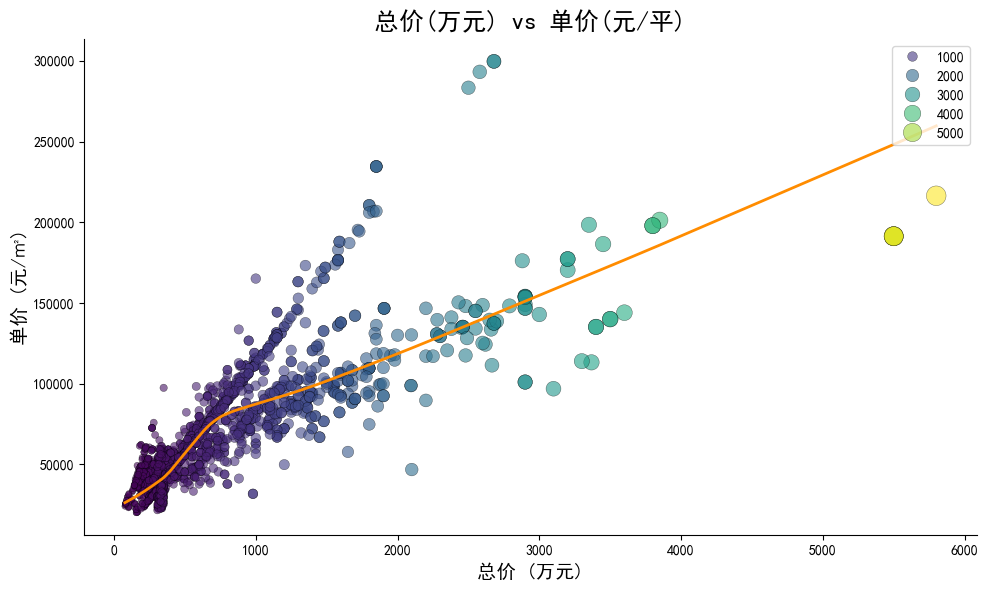

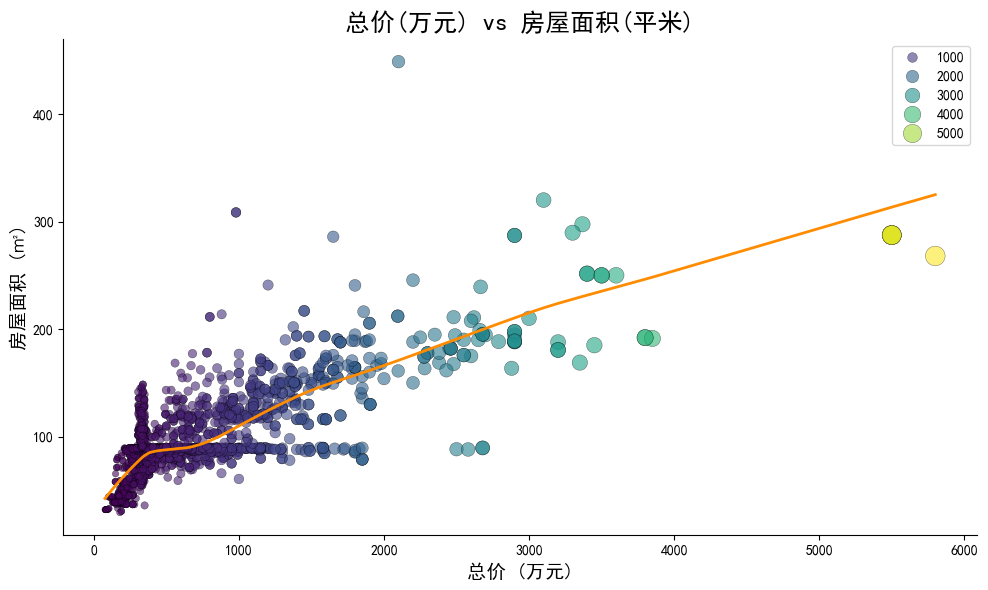

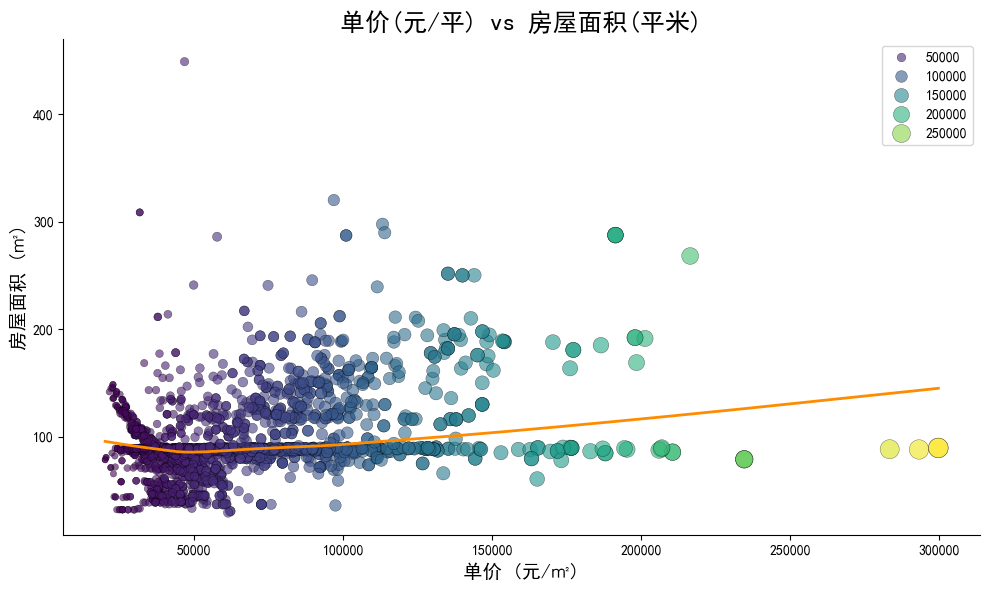

In [28]:
# 1. 总价(万元) vs 单价(元/平)
plt.figure(figsize=(10, 6))
# 散点图（颜色和大小映射总价）
sns.scatterplot(
    x="总价(万元)", 
    y="单价(元/平)", 
    data=data1, 
    hue="总价(万元)", 
    palette="viridis", 
    size="总价(万元)", 
    sizes=(20, 200), 
    alpha=0.6, 
    edgecolor='k', 
    linewidth=0.3
)
# 添加回归趋势线（非线性 LOWESS 拟合）
sns.regplot(
    x="总价(万元)", 
    y="单价(元/平)", 
    data=data1, 
    scatter=False, 
    lowess=True, 
    color="darkorange", 
    line_kws={"lw": 2, "label": "趋势线（LOWESS）"}
)
plt.title("总价(万元) vs 单价(元/平)", fontsize=18, fontweight='bold')
plt.xlabel("总价 (万元)", fontsize=14)
plt.ylabel("单价 (元/㎡)", fontsize=14)
plt.legend(title=None, loc='upper right', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# 2. 总价(万元) vs 房屋面积(平米)
plt.figure(figsize=(10, 6))
# 散点图（颜色和大小映射总价）
sns.scatterplot(
    x="总价(万元)", 
    y="房屋面积(平米)", 
    data=data1, 
    hue="总价(万元)", 
    palette="viridis", 
    size="总价(万元)", 
    sizes=(20, 200), 
    alpha=0.6, 
    edgecolor='k', 
    linewidth=0.3
)
# 添加回归趋势线（非线性 LOWESS 拟合）
sns.regplot(
    x="总价(万元)", 
    y="房屋面积(平米)", 
    data=data1, 
    scatter=False, 
    lowess=True, 
    color="darkorange", 
    line_kws={"lw": 2, "label": "趋势线（LOWESS）"}
)
plt.title("总价(万元) vs 房屋面积(平米)", fontsize=18, fontweight='bold')
plt.xlabel("总价 (万元)", fontsize=14)
plt.ylabel("房屋面积 (㎡)", fontsize=14)
plt.legend(title=None, loc='upper right', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# 3. 单价(元/平) vs 房屋面积(平米)
plt.figure(figsize=(10, 6))
# 散点图（颜色和大小映射单价）
sns.scatterplot(
    x="单价(元/平)", 
    y="房屋面积(平米)", 
    data=data1, 
    hue="单价(元/平)", 
    palette="viridis", 
    size="单价(元/平)", 
    sizes=(20, 200), 
    alpha=0.6, 
    edgecolor='k', 
    linewidth=0.3
)
# 添加回归趋势线（非线性 LOWESS 拟合）
sns.regplot(
    x="单价(元/平)", 
    y="房屋面积(平米)", 
    data=data1, 
    scatter=False, 
    lowess=True, 
    color="darkorange", 
    line_kws={"lw": 2, "label": "趋势线（LOWESS）"}
)
plt.title("单价(元/平) vs 房屋面积(平米)", fontsize=18, fontweight='bold')
plt.xlabel("单价 (元/㎡)", fontsize=14)
plt.ylabel("房屋面积 (㎡)", fontsize=14)
plt.legend(title=None, loc='upper right', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# 1

### 核密度估计图

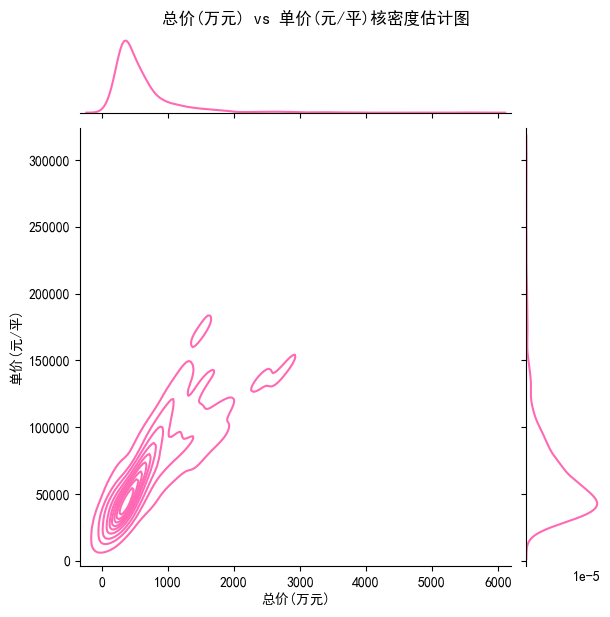

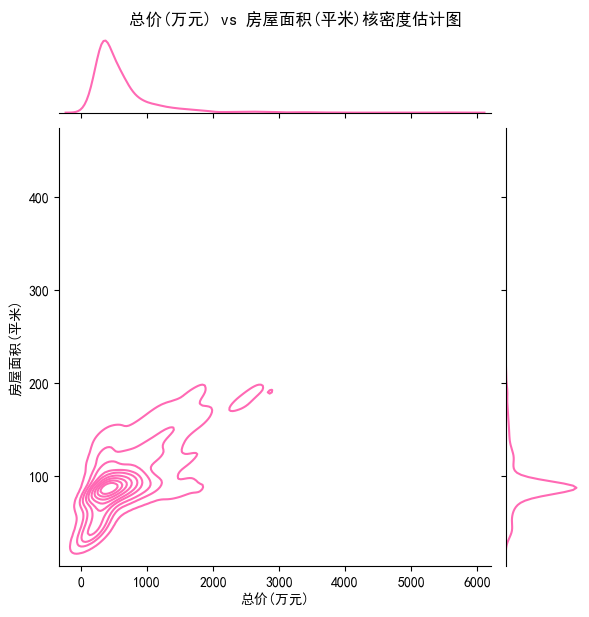

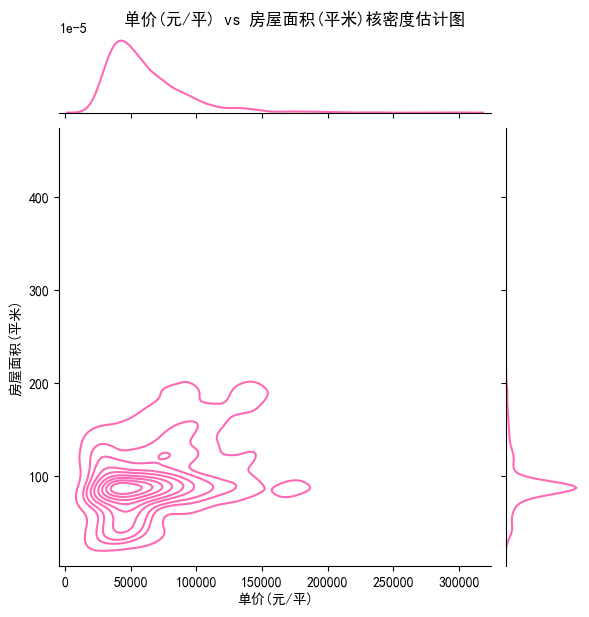

In [29]:
# 总价(万元) vs 单价(元/平)核密度估计图
sns.jointplot(x='总价(万元)', y='单价(元/平)', data=data1, kind='kde', color='hotpink')
plt.suptitle("总价(万元) vs 单价(元/平)核密度估计图", y=1.02)
plt.show()

# 总价(万元) vs 房屋面积(平米)核密度估计图
sns.jointplot(x='总价(万元)', y='房屋面积(平米)', data=data1, kind='kde', color='hotpink')
plt.suptitle("总价(万元) vs 房屋面积(平米)核密度估计图", y=1.02)
plt.show()

# 单价(元/平) vs 房屋面积(平米)核密度估计图
sns.jointplot(x='单价(元/平)', y='房屋面积(平米)', data=data1, kind='kde', color='hotpink')
plt.suptitle("单价(元/平) vs 房屋面积(平米)核密度估计图", y=1.02)
plt.show()

# 1

### 各区房源数量统计

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\2735160334.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\2735160334.py:22: UserWarning:

The palette list has more values (11) than needed (10), which may not be intended.



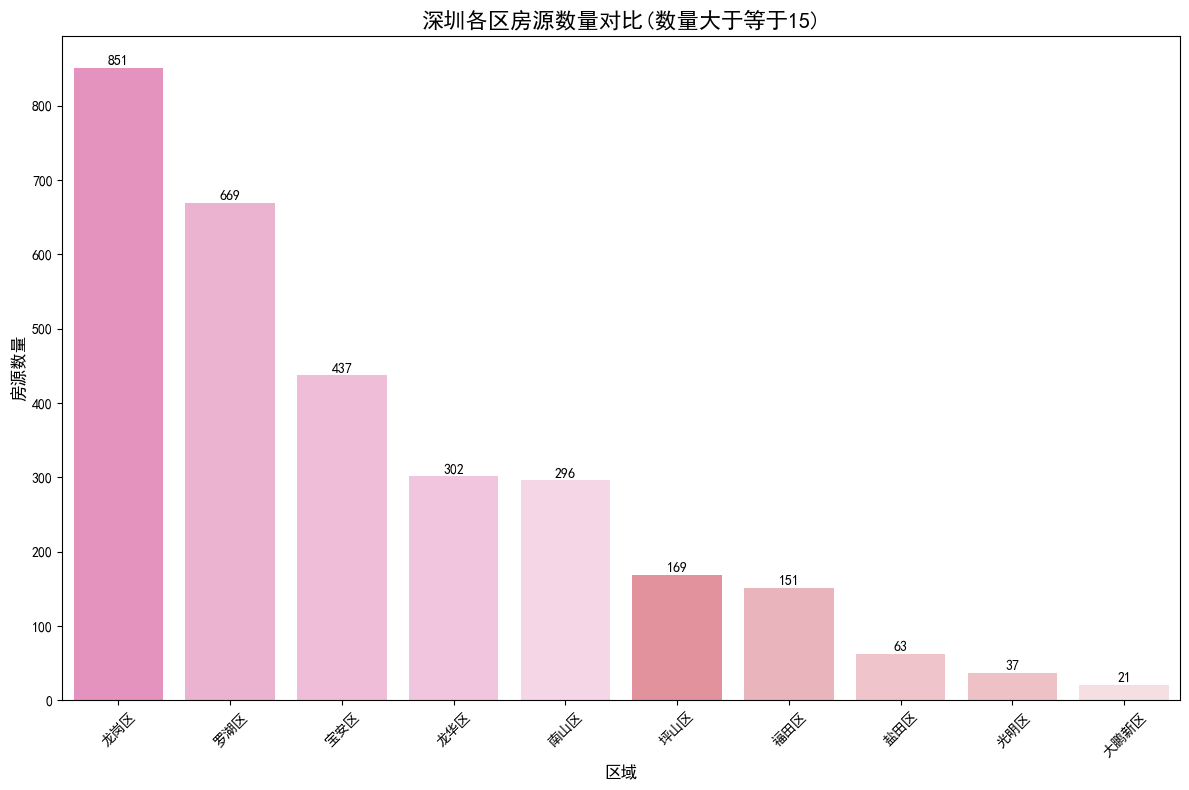

In [42]:
# 统计各区房源数量
count_area = df['区'].value_counts().reset_index()
count_area.columns = ['区域', '房源数量']
#print(count_area)
count_area_filtered = count_area[count_area['房源数量'] >= 10]
colors = [
    '#F285C0',  # 深粉色
    '#F6A9D2',  # 深红色（可选，用于渐变的末端）
    '#F7B5D9',  # 深红色（可选，用于渐变的末端）
    '#F8BEDE',  # 深红色（可选，用于渐变的末端）
    '#FAD1E7',  # 更深的粉色
    '#EE8594',  # 深粉色
    '#F3ABB6',  # 深一点的粉色
    '#F6BDC5',  # 柔和的粉色
    '#F5B9C2',  # 浅粉色
    '#FADBDF',  # 非常浅的粉色（接近白色）
    '#FDEEF0'   # 非常浅的粉色（接近白色）
]

# 绘制图表
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='区域', y='房源数量', data=count_area_filtered, palette=colors)
ax.set_title("深圳各区房源数量对比(数量大于等于15)", fontsize=16)
ax.set_xlabel('区域', fontsize=12)
ax.set_ylabel('房源数量', fontsize=12)
plt.xticks(rotation=45)
for index, row in count_area_filtered.iterrows():
    ax.text(index, row['房源数量'] + 1, str(row['房源数量']), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout() 
plt.show()

In [54]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 规范行政区名称（添加"区"字后缀）
df['区'] = df['区'].apply(lambda x: x + '区' if not x.endswith('区') else x)

# 统计各区房源数量
count_area = df['区'].value_counts().reset_index()
count_area.columns = ['区域', '房源数量']

# 生成地图数据对
pair = list(zip(count_area['区域'], count_area['房源数量']))

# 创建地图
map_shenzhen = Map(init_opts=opts.InitOpts(
    theme='roma',  # 使用浅色主题
    width='1600px',
    height='800px'
))

map_shenzhen.add(
    series_name='房源数量', 
    data_pair=pair, 
    maptype="深圳", 
    is_map_symbol_show=False
)

map_shenzhen.set_series_opts(label_opts=opts.LabelOpts(is_show=False))  # 不显示区域名称

map_shenzhen.set_global_opts(
    title_opts=opts.TitleOpts(title="深圳市各区房源数量分布", pos_left='left', pos_top='top'),  # 调整标题位置
    visualmap_opts=opts.VisualMapOpts(
        max_=count_area['房源数量'].max(),  # 设置最大值
        is_piecewise=True,  # 分段显示
        pieces = [
            {"max": count_area['房源数量'].max(), "min": 1000, "label": "1000及以上", "color": "crimson"},  # 深粉色
            {"max": 999, "min": 500, "label": "500-999", "color": "hotpink"},  # 深红色
            {"max": 499, "min": 100, "label": "100-499", "color": "#F7B5D9"},  # 深红色
            {"max": 99, "min": 0, "label": "0-99", "color": "#FAD1E7"}  # 更深的粉色
        ],
        orient='vertical',  # 图例方向
        pos_left='left',  # 图例位置
        pos_top='middle'  # 图例位置
    )
)

# 渲染到 Notebook 中
map_shenzhen.render_notebook()
map_shenzhen.render("深圳各区房源数量分布.html")

'd:\\data_analysis\\深圳可视化\\深圳各区房源数量分布.html'

# 1

### 各区房源单价分布统计

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3615854283.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3615854283.py:8: UserWarning:

The palette list has more values (11) than needed (10), which may not be intended.



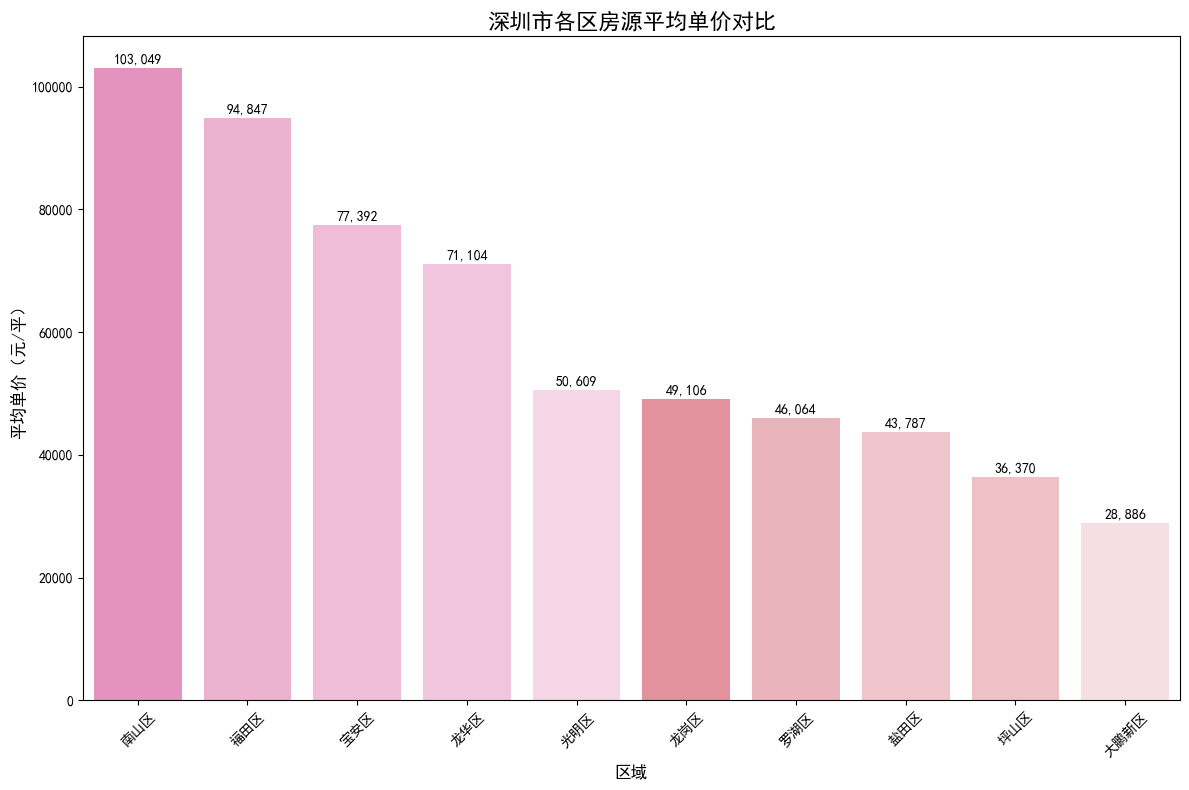

In [55]:
# 计算各区房源的平均单价
avg_price_area = df.groupby('区')['单价(元/平)'].mean().reset_index()
avg_price_area.columns = ['区域', '平均单价']
avg_price_area = avg_price_area.sort_values(by='平均单价', ascending=False)

# 绘制柱状图
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='区域', y='平均单价', data=avg_price_area, palette=colors)
ax.set_title("深圳市各区房源平均单价对比", fontsize=16)
ax.set_xlabel('区域', fontsize=12)
ax.set_ylabel('平均单价（元/平）', fontsize=12)
plt.xticks(rotation=45)

# 在每个柱子上显示平均单价
for bar, price in zip(ax.patches, avg_price_area['平均单价']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    price_str = f"{price:,.0f}"
    ax.text(x, y + 400, price_str, ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()



In [60]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 规范行政区名称（添加"区"字后缀）
df['区'] = df['区'].apply(lambda x: x + '区' if not x.endswith('区') else x)

# 按规范后的区名统计平均单价
count_area = df.groupby('区')['单价(元/平)'].mean().reset_index()

# 生成地图数据对
pair = list(zip(count_area['区'], count_area['单价(元/平)']))

# 创建地图
map_shenzhen = Map(init_opts=opts.InitOpts(
    theme='roma',
    width='800px',
    height='400px'
))

map_shenzhen.add(
    series_name='深圳', 
    data_pair=pair, 
    maptype="深圳", 
    is_roam=False
)

map_shenzhen.set_series_opts(label_opts=opts.LabelOpts(is_show=False))  # 不显示标签

map_shenzhen.set_global_opts(
    title_opts=opts.TitleOpts(title="深圳市各区房源单价分布"),
    visualmap_opts=opts.VisualMapOpts(
        min_=count_area["单价(元/平)"].min(),
        max_=count_area["单价(元/平)"].max(),
        range_color = ["#FAD1E7", "#F7B5D9", "pink", "deeppink"]
    )
)

# 渲染到 Notebook 中
map_shenzhen.render_notebook()
#map_shenzhen.render("深圳各区房源单价分布.html")

# 1

### 各区房源总价分布统计

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3013924155.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3013924155.py:9: UserWarning:

The palette list has more values (11) than needed (10), which may not be intended.



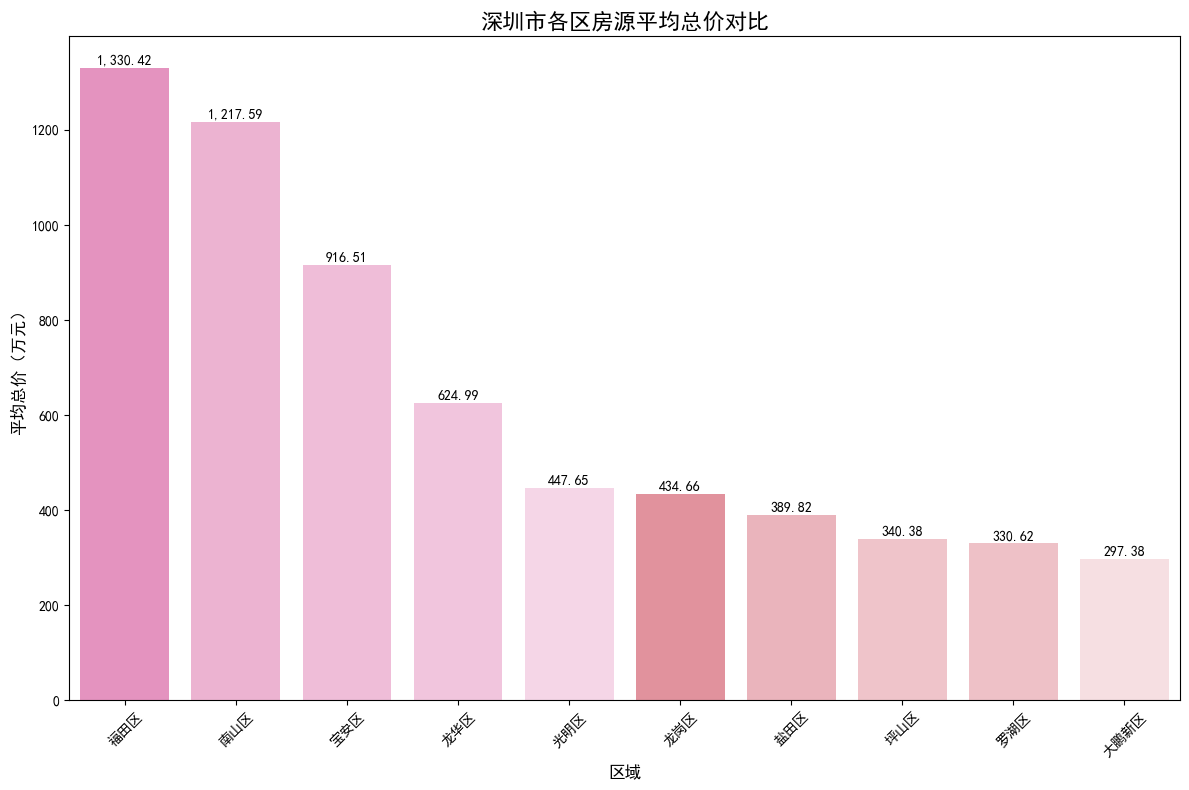

In [61]:
# 计算各区房源的平均单价
avg_total_price = df.groupby('区')['总价(万元)'].mean().reset_index()
avg_total_price.columns = ['区域', '平均总价']
avg_total_price = avg_total_price.sort_values(by='平均总价', ascending=False)
#print(avg_total_price)

# 绘制柱状图
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='区域', y='平均总价', data=avg_total_price, palette=colors)
ax.set_title("深圳市各区房源平均总价对比", fontsize=16)
ax.set_xlabel('区域', fontsize=12)
ax.set_ylabel('平均总价（万元）', fontsize=12)
plt.xticks(rotation=45)

# 在柱子上添加数字标签（使用柱子的实际位置）
for bar, price in zip(ax.patches, avg_total_price['平均总价']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 2, f"{price:,.2f}", ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

df['区'] = df['区'].apply(lambda x: x + '区' if not x.endswith('区') else x)

# 按规范后的区名统计平均单价
count_area = df.groupby('区')['总价(万元)'].mean().reset_index()

# 生成地图数据对
pair = list(zip(count_area['区'], count_area['总价(万元)']))

# 创建地图
map_shenzhen = Map(init_opts=opts.InitOpts(
    theme='roma',
    width='800px',
    height='400px'
))

map_shenzhen.add(
    series_name='深圳', 
    data_pair=pair, 
    maptype="深圳", 
    is_roam=False
)

map_shenzhen.set_series_opts(label_opts=opts.LabelOpts(is_show=False))  # 不显示标签

map_shenzhen.set_global_opts(
    title_opts=opts.TitleOpts(title="深圳市各区房源总价分布"),
    visualmap_opts=opts.VisualMapOpts(
        min_=count_area["总价(万元)"].min(),
        max_=count_area["总价(万元)"].max(),
        range_color=["#FAD1E7", "#F7B5D9", "pink", "deeppink"]
    )
)

# 渲染到 Notebook 中
map_shenzhen.render_notebook()
#map_shenzhen.render("深圳各区房源总价分布.html")

### 离散变量可视化

# 1

#### 条形图

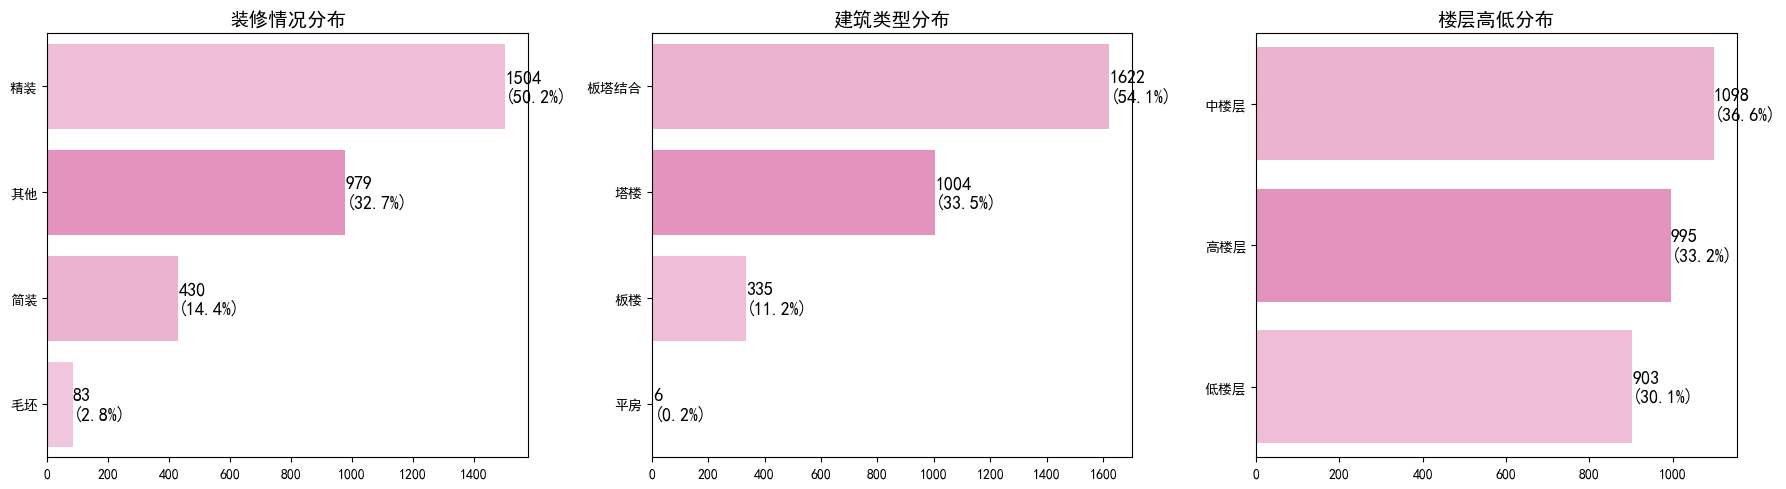

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

cat_cols = ["装修情况", "建筑类型", "楼层高低"]
palette_name = colors

plt.figure(figsize=(18, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)

    n_categories = df[col].nunique()
    colors = sns.color_palette(palette_name, n_colors=n_categories)

    ax = sns.countplot(y=col, data=df, 
                       order=df[col].value_counts().index,
                       hue=col,
                       palette=colors,
                       legend=False)
    
    total = len(df[col])
    for p in ax.patches:
        count = int(p.get_width())
        percentage = f'{count / total:.1%}'
        ax.annotate(f'{count}\n({percentage})',
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center', fontsize=13)
    
    plt.title(f"{col}分布", fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.savefig("分类分布柱状图.jpg", dpi=300, bbox_inches='tight')
plt.show()


# 1

#### 环形图

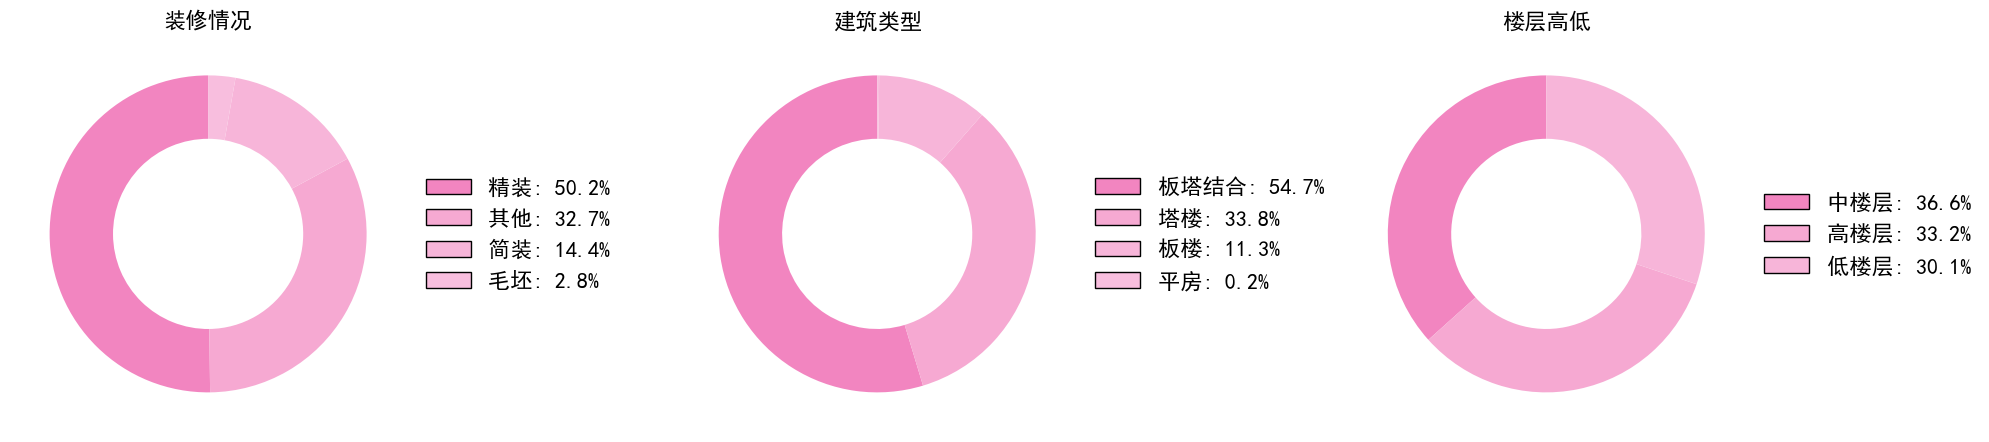

In [70]:
from matplotlib.patches import Patch

def plot_donut(col, ax):
    value_counts = df[col].value_counts()
    total = value_counts.sum()
    n_categories = len(value_counts)
    colors = sns.color_palette(palette_name, n_colors=n_categories)

    # 绘制饼图（不带标签）
    wedges, _ = ax.pie(
        value_counts,
        startangle=90,
        wedgeprops=dict(width=0.4),
        colors=colors
    )

    # 中心空白形成环形图
    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    ax.add_artist(centre_circle)

    # 构造图例元素
    legend_elements = []
    for label, value, color in zip(value_counts.index, value_counts.values, colors):
        percent = value / total * 100
        legend_label = f'{label}: {percent:.1f}%'
        legend_elements.append(Patch(facecolor=color, edgecolor='black', label=legend_label))

    # 添加图例到右侧
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, frameon=False)

    # 设置标题
    ax.set_title(col, fontsize=16)

plt.figure(figsize=(20, 8))  # 宽度稍增，给图例腾空间
for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(1, 3, i)
    plot_donut(col, ax)

plt.tight_layout()
plt.show()


# 1

### 挂牌时间趋势分析

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\1562962998.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\1562962998.py:19: UserWarning:


The palette list has fewer values (11) than needed (12) and will cycle, which may produce an uninterpretable plot.



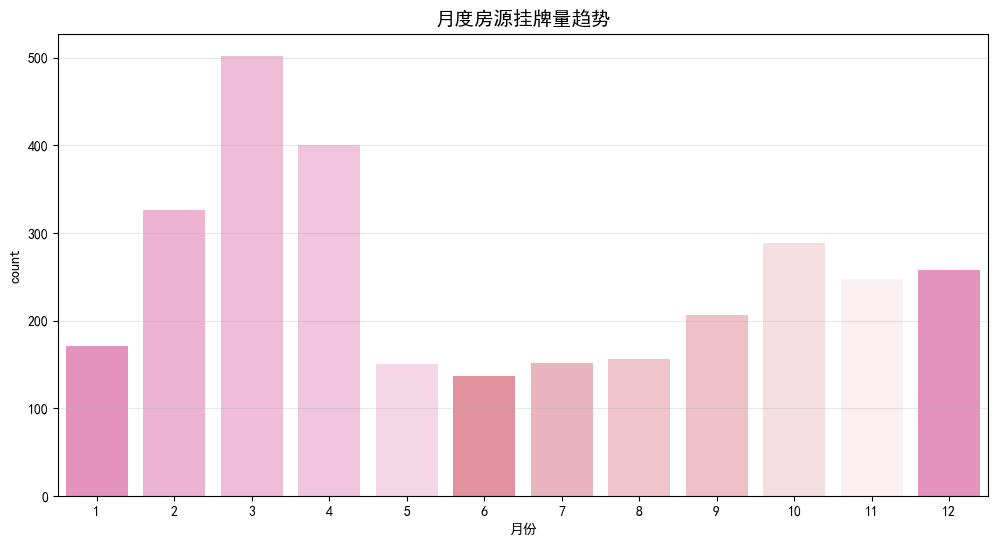

In [71]:
# 时间数据处理
df['挂牌时间'] = pd.to_datetime(df['挂牌时间'], format='%Y/%m/%d')
df['月份'] = df['挂牌时间'].dt.month
colors = [
    '#F285C0',  # 深粉色
    '#F6A9D2',  # 深红色（可选，用于渐变的末端）
    '#F7B5D9',  # 深红色（可选，用于渐变的末端）
    '#F8BEDE',  # 深红色（可选，用于渐变的末端）
    '#FAD1E7',  # 更深的粉色
    '#EE8594',  # 深粉色
    '#F3ABB6',  # 深一点的粉色
    '#F6BDC5',  # 柔和的粉色
    '#F5B9C2',  # 浅粉色
    '#FADBDF',  # 非常浅的粉色（接近白色）
    '#FDEEF0'   # 非常浅的粉色（接近白色）
]
# 月度挂牌量变化（橙色渐变）
plt.figure(figsize=(12,6))
sns.countplot(x='月份', data=df, palette=colors)
plt.title("月度房源挂牌量趋势", fontsize=14)
plt.grid(axis='y', alpha=0.3)


# 2-关系探究

### 挂牌市场与价格关系图

Text(0.5, 1.02, '挂牌天数 vs 单价(元/平)六边形分布图')

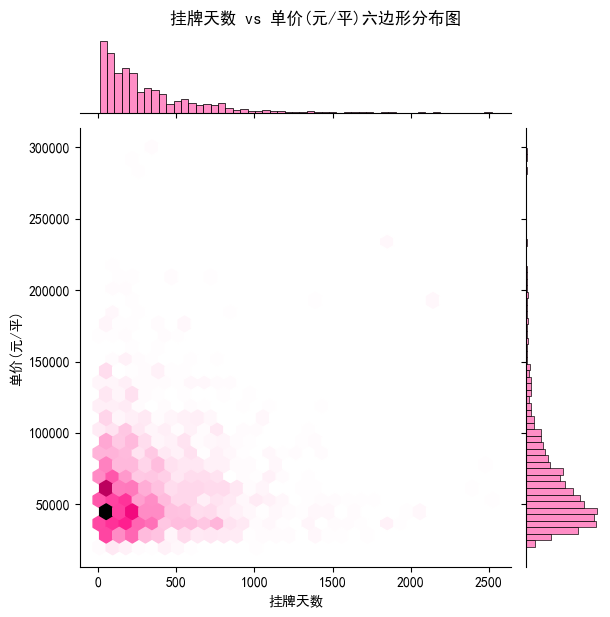

In [77]:
df['挂牌天数'] = (datetime.now() - df['挂牌时间']).dt.days
sns.jointplot(x='挂牌天数', y='单价(元/平)', data=df, kind='hex', color='hotpink', gridsize=30)
plt.suptitle("挂牌天数 vs 单价(元/平)六边形分布图", y=1.02)


# 2交互展示

### 价格热力图

In [81]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import geopandas as gpd  # 需要安装geopandas来处理地理数据

# 清理数据
df_clean = df[['lat', 'lon', '单价(元/平)']].dropna()
df_clean = df_clean[
    df_clean['lat'].apply(lambda x: isinstance(x, (int, float))) &
    df_clean['lon'].apply(lambda x: isinstance(x, (int, float))) &
    df_clean['单价(元/平)'].apply(lambda x: isinstance(x, (int, float)))
]

# 构造热力图数据
heat_data = df_clean.apply(lambda row: [row['lat'], row['lon'], row['单价(元/平)']], axis=1).tolist()

gradient = {
    '0.4': '#FDEEF0',  # 非常浅的粉色（接近白色）
    '0.6': '#F5B9C2',  # 浅粉色
    '0.8': 'hotpink',  # 深粉色
    '1.0': 'crimson'   # 深红色（可选，用于渐变的末端）
}

# 创建地图
price_map = folium.Map(location=[22.543096, 114.057865], zoom_start=10)
shenzhen_boundary = gpd.read_file("shenzhen_boundary.geojson")

# 将边界数据添加到地图
folium.GeoJson(
    shenzhen_boundary,
    name="深圳边界",
    style_function=lambda x: {
        "fillColor": "none",  # 不填充颜色
        "color": "black",     # 边界颜色
        "weight": 1           # 边界线宽
    }
).add_to(price_map)

# 添加热力图
HeatMap(
    data=heat_data,
    gradient=gradient,
    radius=13,
    max_zoom=15
).add_to(price_map)

# 显示地图
price_map

Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1


### 环线位置分析

# 2-关系

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3348164744.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3348164744.py:3: UserWarning:

The palette list has more values (11) than needed (3), which may not be intended.



Text(0.5, 1.0, '不同环线位置单价中位数对比')

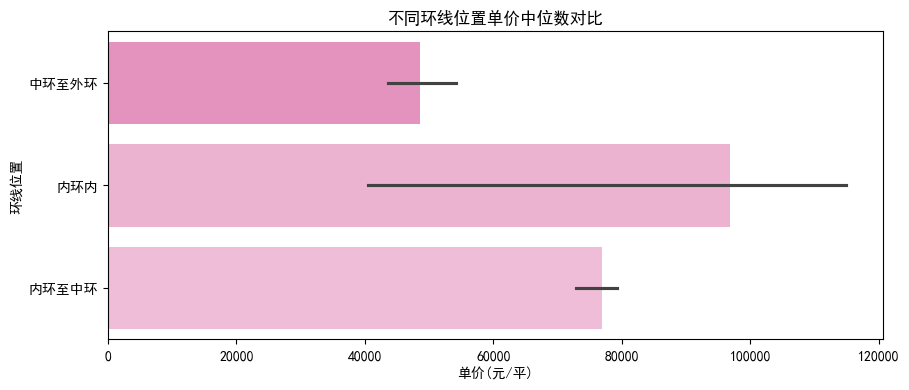

In [82]:
# 环线均价对比（横向柱状图）
plt.figure(figsize=(10,4))
sns.barplot(y='环线位置', x='单价(元/平)', data=df, 
           palette=colors, estimator=np.median)
plt.title("不同环线位置单价中位数对比")

# 2-关系

### 建筑类型与价格关系

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3260368375.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6720\3260368375.py:3: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



Text(0.5, 1.0, '不同建筑类型单价分布')

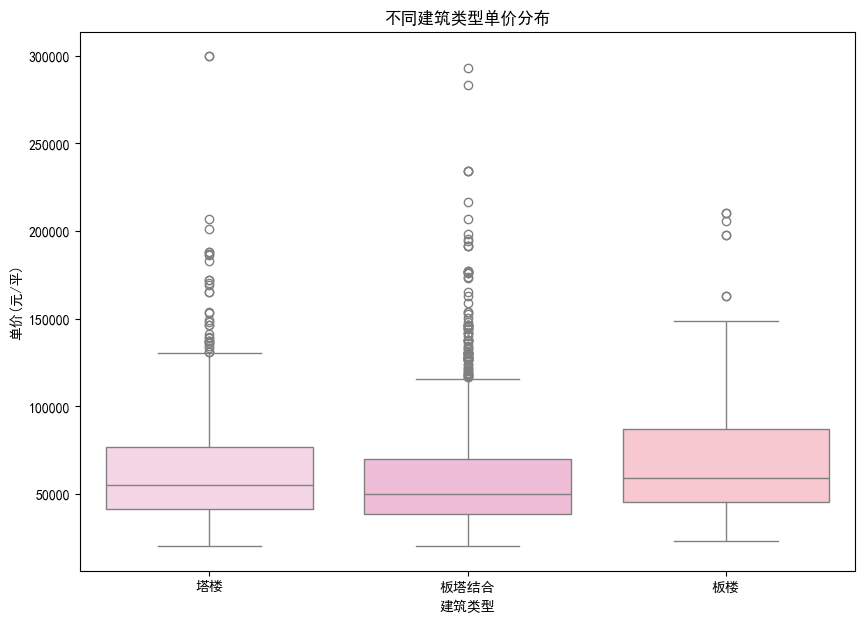

In [83]:
# 分组箱线图
plt.figure(figsize=(10,7))
sns.boxplot(x='建筑类型', y='单价(元/平)', data=df[df['建筑类型'].isin(['板楼', '塔楼', '板塔结合'])], 
           palette=["#FAD1E7", "#F7B5D9", "pink", "deeppink"])
plt.xticks(rotation=0)
plt.title("不同建筑类型单价分布")


# 2-交互式

### 交互式可视化

In [34]:
# Plotly交互示例
import plotly.express as px
# 定义粉色色系的颜色列表
pink_colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#FFB6C1', '#F08080']

fig = px.scatter(df, x='房屋面积(平米)', y='总价(万元)', 
                 color='区', color_discrete_sequence=pink_colors,
                 hover_data=['小区名称', '建筑类型'])
fig.update_layout(title='总价-面积交互分布图')
fig.show()
fig.write_html("总价-面积交互分布图.html")

In [35]:
fig = px.scatter(df, x='房屋面积(平米)', y='单价(元/平)', 
                color='区', color_discrete_sequence=pink_colors,
                hover_data=['小区名称','建筑类型'])
fig.update_layout(title='单价-面积交互分布图')
fig.show()
fig.write_html("单价-面积交互分布图.html")

In [36]:
fig = px.scatter(df, x='单价(元/平)', y='总价(万元)', 
                color='区', color_discrete_sequence=pink_colors,
                hover_data=['小区名称','建筑类型'])
fig.update_layout(title='单价-总价交互分布图')
fig.show()
fig.write_html("总价-单价交互分布图.html")

# 1

### 聚类分析结果

d:\users\anaconda3\envs\pytorch2023\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\users\anaconda3\envs\pytorch2023\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\users\anaconda3\envs\pytorch2023\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\users\anaconda3\envs\pytorch2023\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\users\anaconda3\envs\pytorch2023\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


<AxesSubplot:xlabel='总价(万元)', ylabel='单价(元/平)'>

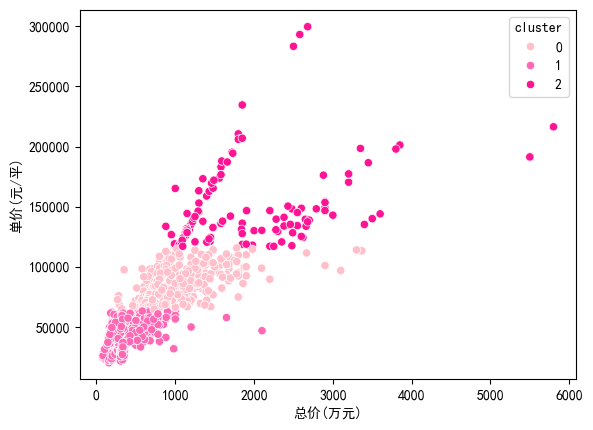

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df[['单价(元/平)','总价(万元)']])
df['cluster'] = kmeans.labels_
sns.scatterplot(x='总价(万元)', y='单价(元/平)', hue='cluster',
               data=df, palette=['#FFC0CB', '#FF69B4', '#FF1493'])

<AxesSubplot:xlabel='房屋面积(平米)', ylabel='总价(万元)'>

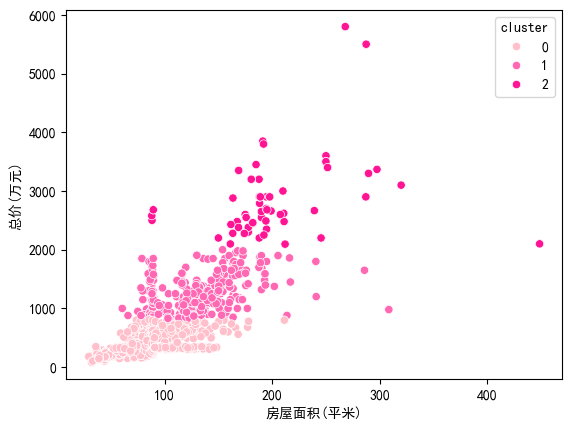

In [31]:
kmeans = KMeans(n_clusters=3).fit(df[['总价(万元)','房屋面积(平米)']])
df['cluster'] = kmeans.labels_

sns.scatterplot(x='房屋面积(平米)', y='总价(万元)', hue='cluster',
               data=df, palette=['#FFC0CB', '#FF69B4', '#FF1493'])

<AxesSubplot:xlabel='房屋面积(平米)', ylabel='单价(元/平)'>

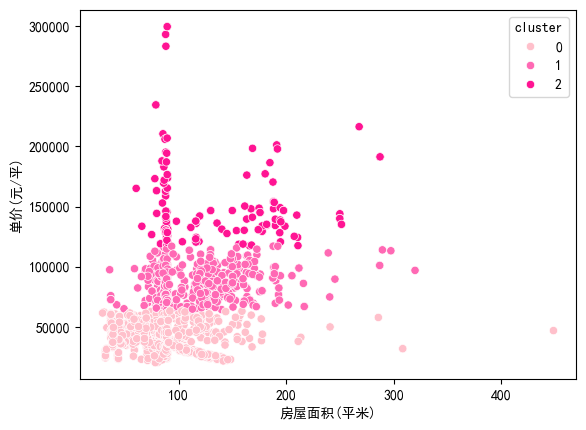

In [32]:
kmeans = KMeans(n_clusters=3).fit(df[['单价(元/平)','房屋面积(平米)']])
df['cluster'] = kmeans.labels_

sns.scatterplot(x='房屋面积(平米)', y='单价(元/平)', hue='cluster',
               data=df, palette=['#FFC0CB', '#FF69B4', '#FF1493'])

In [1]:
import pandas as pd
import re

df = pd.read_csv("深圳_geo.csv", encoding="utf-8")

df = df[df["配备电梯"]=='有']
# 中文数字转阿拉伯数字映射
cn_num_map = {
    '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
    '六': 6, '七': 7, '八': 8, '九': 9, '两': 2
}

def extract_elevator_ratio(text):
    if "无电梯" in text:
        return None
    match = re.findall(r'([一二三四五六七八九两])梯([一二三四五六七八九两])户', text)
    if match:
        e_num = cn_num_map.get(match[0][0], None)
        h_num = cn_num_map.get(match[0][1], None)
        if e_num is not None and h_num is not None:
            return f"{e_num}/{h_num}"
    return None

# 应用函数
df["梯户比"] = df["梯户比例"].apply(extract_elevator_ratio)

# 拆分为数值
df["电梯数"] = df["梯户比"].str.split("/").str[0].astype(float)
df["户数"] = df["梯户比"].str.split("/").str[1].astype(float)
df["梯户比数值"] = df["电梯数"] / df["户数"]

In [2]:
print(df[["电梯数", "户数", "梯户比数值"]].head())

   电梯数   户数     梯户比数值
0  2.0  8.0  0.250000
1  3.0  9.0  0.333333
2  2.0  8.0  0.250000
3  3.0  9.0  0.333333
4  2.0  5.0  0.400000


# 2-相关性分析-回归

In [3]:
import statsmodels.api as sm
import numpy as np

X = df[["梯户比数值", "单价(元/平)", "房屋面积(平米)"]]
y = df["总价(万元)"]
data = pd.concat([X, y], axis=1)

data = data.replace([np.inf, -np.inf], np.nan).dropna()
print(f"清洗后剩余 {len(data)} 条数据")

X_clean = data[["梯户比数值", "单价(元/平)", "房屋面积(平米)"]]
y_clean = data["总价(万元)"]

X_clean = sm.add_constant(X_clean)

model = sm.OLS(y_clean, X_clean).fit()

print(model.summary())

清洗后剩余 2317 条数据
                            OLS Regression Results                            
Dep. Variable:                 总价(万元)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        20:50:18   Log-Likelihood:                -14689.
No. Observations:                2317   AIC:                         2.939e+04
Df Residuals:                    2313   BIC:                         2.941e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -942.1522     10.097    -

# 2-关系

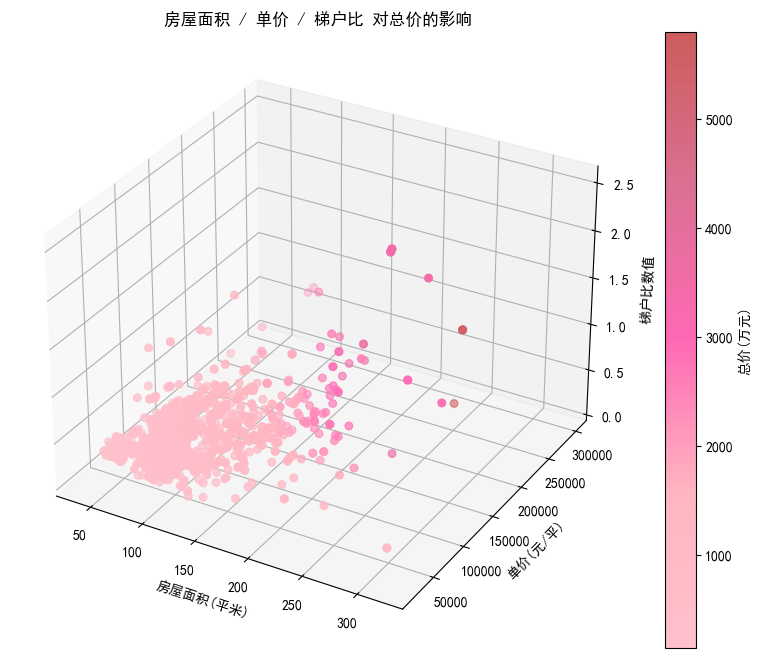

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 定义粉色的颜色映射
pink_colors = ["#FFC0CB", "#FFB6C1", "#FF69B4", "#DB7093", "#CD5C5C"]
cmap_name = 'custom_pink'
pink_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, pink_colors)

# 配置显示参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# 简化变量名
x = data["房屋面积(平米)"]
y = data["单价(元/平)"]
z = data["梯户比数值"]
price = data["总价(万元)"]

# 创建 3D 图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 使用房屋面积、单价、梯户比为坐标轴，总价为颜色
p = ax.scatter(x, y, z, c=price, cmap=pink_cmap, s=30)

# 设置坐标轴标签
ax.set_xlabel("房屋面积(平米)")
ax.set_ylabel("单价(元/平)")
ax.set_zlabel("梯户比数值")

# 添加颜色条
fig.colorbar(p, ax=ax, label="总价(万元)")

# 添加标题
plt.title("房屋面积 / 单价 / 梯户比 对总价的影响")

# 显示图形
plt.show()

# 2-关系

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34264\3492060579.py:49: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


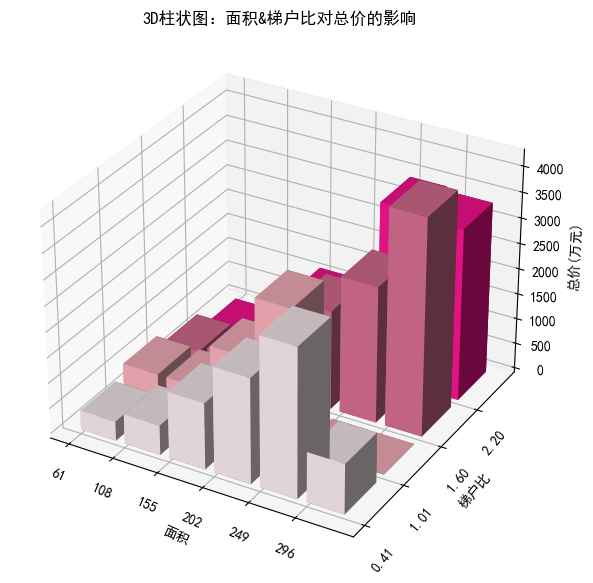

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

custom_colors = ["lavenderblush", "lightpink", "palevioletred", "deeppink"]

# 分箱
area_bins = pd.cut(data["房屋面积(平米)"], bins=6)
ratio_bins = pd.cut(data["梯户比数值"], bins=4)

# 计算平均总价
pivot_table = data.pivot_table(
    values="总价(万元)",
    index=area_bins,
    columns=ratio_bins,
    aggfunc="mean"
)
Z = pivot_table.fillna(0).values

# 网格坐标
X = np.arange(Z.shape[0])
Y = np.arange(Z.shape[1])
xx, yy = np.meshgrid(X, Y)
X_flat, Y_flat = xx.ravel(), yy.ravel()
Z_flat = Z.T.ravel()
bottom = np.zeros_like(Z_flat)

# 映射每个 y（梯户比）组到颜色
color_map = {i: custom_colors[i] for i in range(len(custom_colors))}
colors = [color_map[int(y)] for y in Y_flat]

# 绘图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X_flat, Y_flat, bottom, 0.8, 0.8, Z_flat, color=colors, shade=True)

# 设置坐标轴
ax.set_xlabel('面积', rotation=-24)
ax.set_ylabel('梯户比', rotation=50)
ax.set_zlabel('总价(万元)')
ax.set_xticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels([f"{(idx.left+idx.right)/2:.0f}" for idx in pivot_table.index], rotation=-24)
ax.set_yticks(np.arange(len(pivot_table.columns)))
ax.set_yticklabels([f"{(col.left+col.right)/2:.2f}" for col in pivot_table.columns], rotation=50)

ax.set_title("3D柱状图：面积&梯户比对总价的影响")

plt.tight_layout()
plt.show()


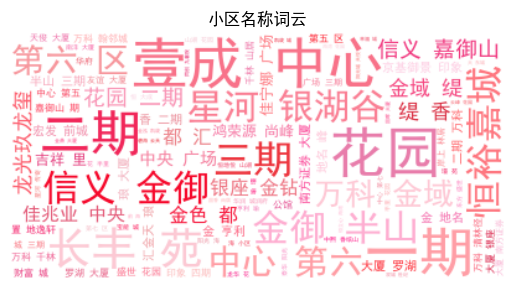

In [16]:
from wordcloud import WordCloud
from jieba import cut
import matplotlib.pyplot as plt
import random

# 合并小区名称生成词云
text = " ".join(df["小区名称"].dropna().apply(lambda x: " ".join(cut(x))))

# 定义粉色系的颜色映射函数
def vibrant_pink_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 生成一个从浅粉到深粉的颜色范围
    h = random.randint(330, 360)  # 色相在330到360之间随机，接近粉色
    s = random.randint(70, 100)  # 饱和度在70%到100%之间随机，使颜色更鲜艳
    l = random.randint(50, 90)  # 亮度在50%到90%之间随机，增加颜色的多样性
    return f"hsl({h}, {s}%, {l}%)"

# 生成词云
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", color_func=vibrant_pink_color_func).generate(text)

# 显示词云
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("小区名称词云")
plt.show()

In [19]:
import pandas as pd
key_columns = ['区', '装修情况', '建筑结构']

df_filtered = df[key_columns].dropna()
df_filtered = df_filtered[df_filtered.apply(lambda x: all(x != ''), axis=1)]

group1 = df_filtered.groupby([key_columns[0], key_columns[1]]).size().reset_index(name='count')
group2 = df_filtered.groupby([key_columns[1], key_columns[2]]).size().reset_index(name='count')

labels = list(pd.unique(df_filtered[key_columns[0]].tolist() + df_filtered[key_columns[1]].tolist() + df_filtered[key_columns[2]].tolist()))

# Build flows and labels
source = []
target = []
value = []

def get_index(label):
    return labels.index(label)

for _, row in group1.iterrows():
    source.append(get_index(row[key_columns[0]]))
    target.append(get_index(row[key_columns[1]]))
    value.append(row['count'])

for _, row in group2.iterrows():
    source.append(get_index(row[key_columns[1]]))
    target.append(get_index(row[key_columns[2]]))
    value.append(row['count'])

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="hotpink"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="房源桑基图：区 → 装修情况 → 建筑结构", font_size=10)
fig.write_html("房源桑基图：区-装修情况-建筑结构.html")


# 2-关系

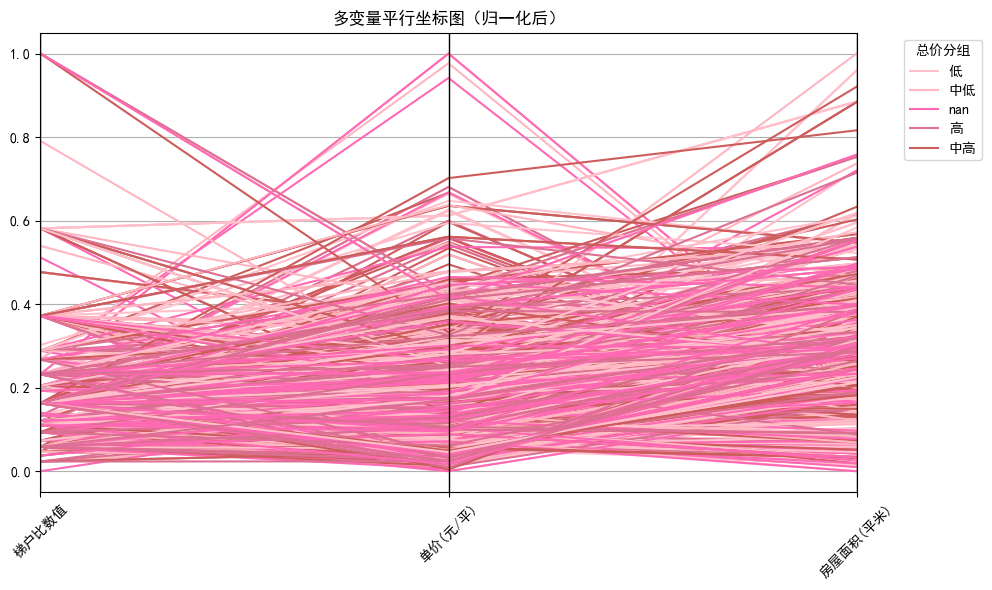

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

# 定义粉色的颜色映射
pink_colors = ["#FFC0CB", "#FFB6C1", "#FF69B4", "#DB7093", "#CD5C5C"]
cmap_name = 'custom_pink'
pink_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, pink_colors)

# 选取绘图字段
columns = ["梯户比数值", "单价(元/平)", "房屋面积(平米)", "总价(万元)"]
parallel_data = df[columns].dropna()

# 归一化处理
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(parallel_data), columns=columns)

# 为了绘图需要一个分类列，这里将总价按区间分为类别（可以根据实际情况调整）
normalized_data["总价(万元)"] = pd.qcut(df.loc[parallel_data.index, "总价(万元)"], q=4, labels=["低", "中低", "中高", "高"])

# 绘图
plt.figure(figsize=(10, 6))
parallel_coordinates(normalized_data, "总价(万元)", colormap=pink_cmap)
plt.title("多变量平行坐标图（归一化后）")
plt.xticks(rotation=45)
plt.legend(title="总价分组", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
